In [1]:
# Обработка датасета и визуализация
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import missingno as msno
import seaborn as sns
import math
# Алгоритмы моделирования
# Классификация:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Регрессия: 
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

#Помощники по моделированию
from sklearn.preprocessing import Normalizer , scale
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# Предварительная обработка 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Показатели оценки
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Настройка визуализаций
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Датасет

### Характеристика датасета
#### Carat : Вес бриллианта в каратах. 1 карат = 0.2 грамма
#### Cut: Качество огранки алмаза:
    -Справедливое, Хорошее, Очень хорошее, Премиум, Идеальное.
#### Color: Цвет бриллианта.
    -Где D был лучшим, а J - худшим.
#### Clarity: Прозрачность алмаза означает отсутствие включений и дефектов.
(В порядке от лучшего к худшему, FL = безупречный, I3 = включения 3-го уровня) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
#### Depth: Глубина бриллианта - это его высота (в миллиметрах), измеряемая от оправки до стола.
#### Table : Ширина таблицы бриллианта, выраженная в процентах от его среднего диаметра.
#### Price : цена бриллианта.
#### X : Длина бриллианта в мм.
#### Y : Ширина ромба в мм.
#### Z : Высота ромба в мм.

#### Качественные характеристики (Категориальные) : Cut, Color, Clarity.

#### Количественные характеристики (Числовые) : Carat, Depth , Table , Price , X , Y, Z.

In [3]:
df = pd.read_csv('F:/Рабочий стол/Diamonds Analysis Project/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

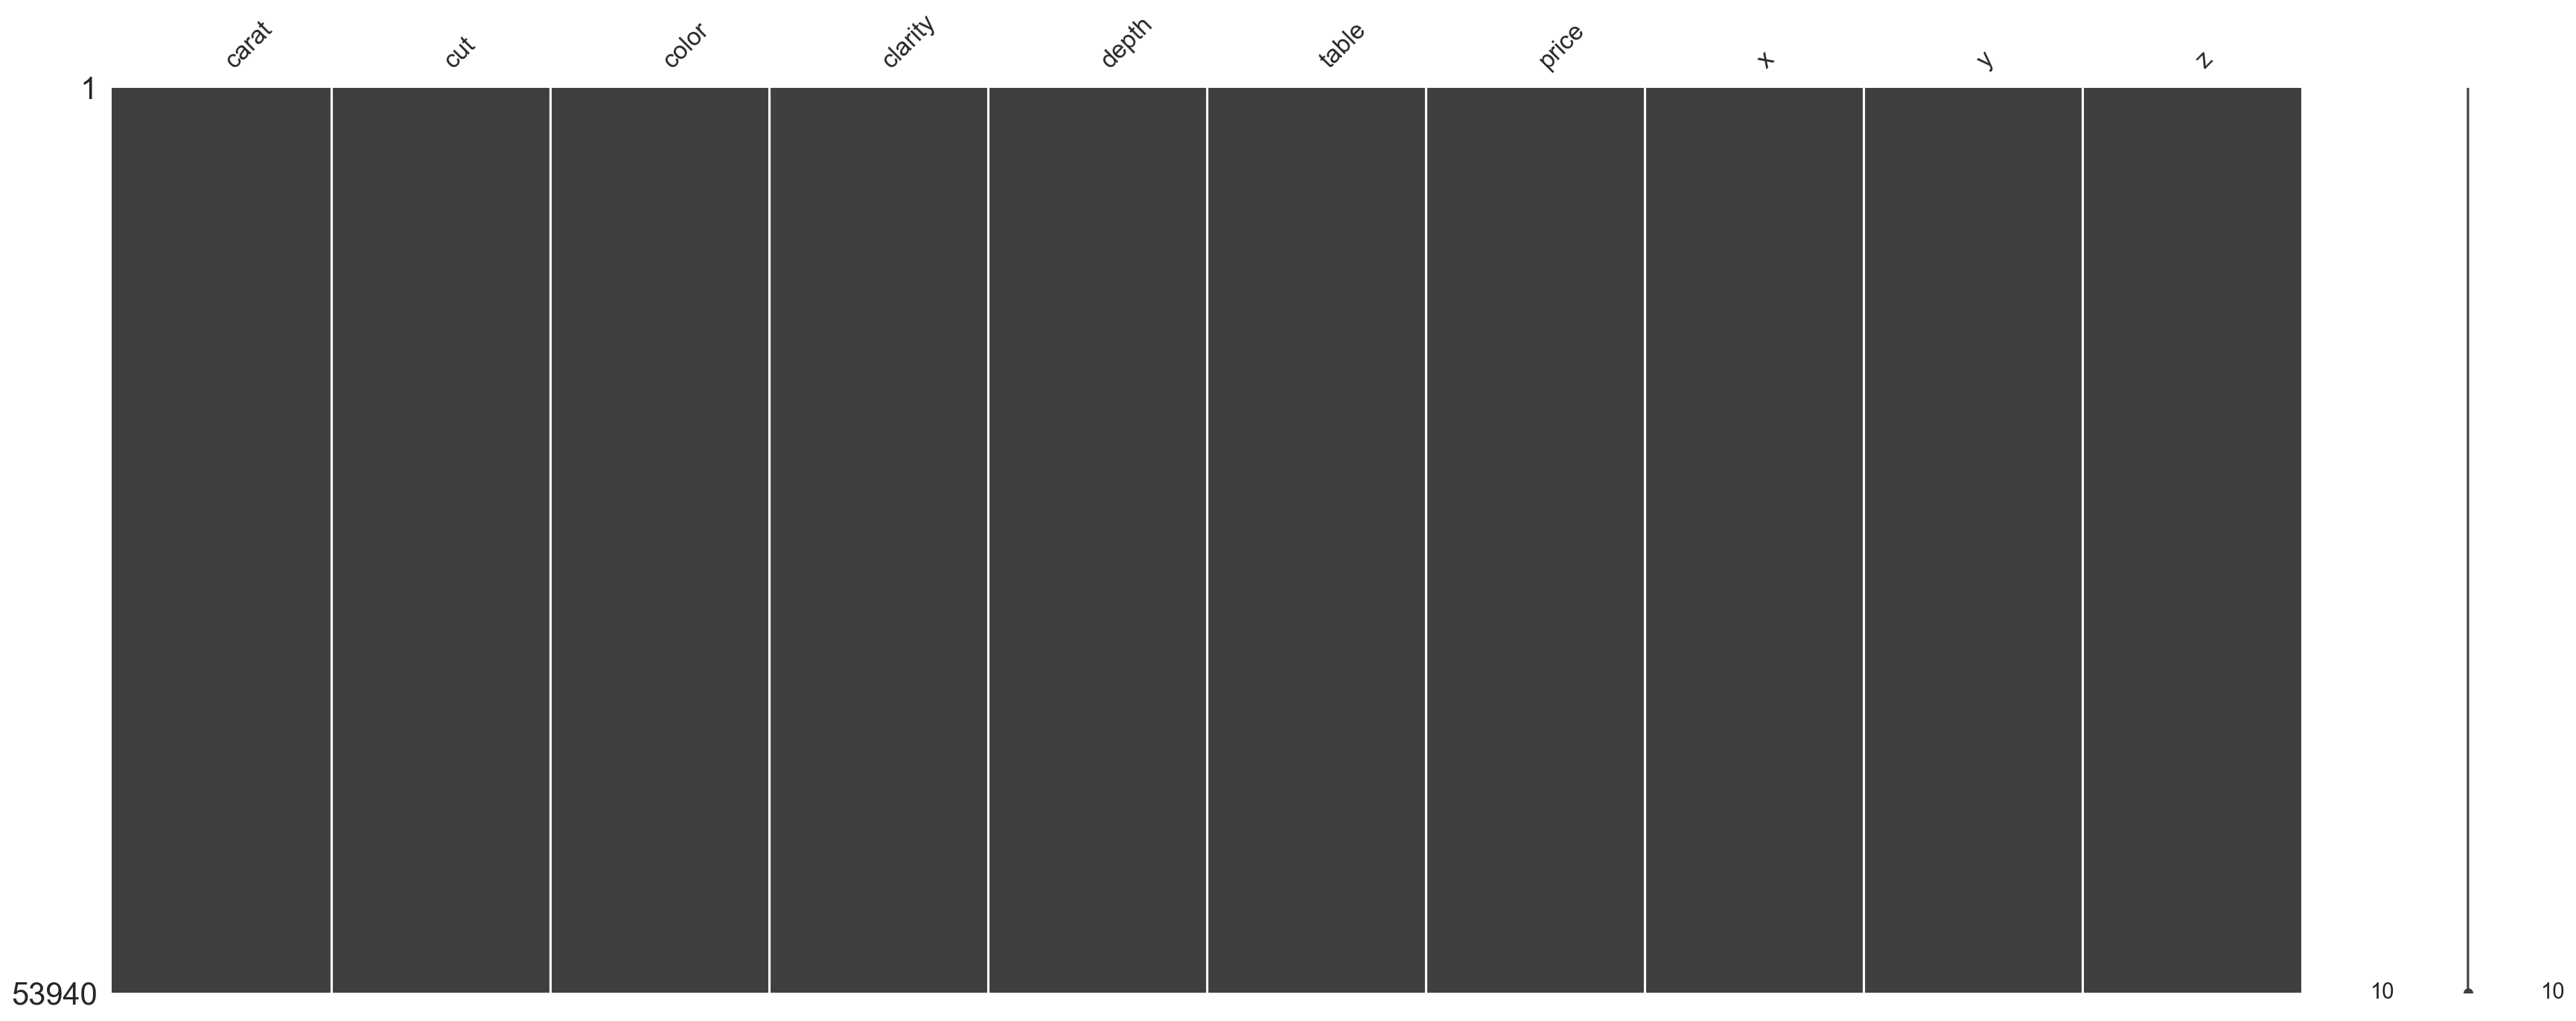

In [8]:
msno.matrix(df)

***Нет никаких пустых значений

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Невозможно, чтобы x,y,z были равны 0. Необходимо проверить эти значения и решить, что с ними делать

In [10]:
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [11]:
len(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])

20

**Отбросим эти значения. Мне кажется, так будет лучше, чем заполнять их средними значениями или медианой

In [12]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis = 1)]

In [13]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


**Теперь значения чистые

<Axes: >

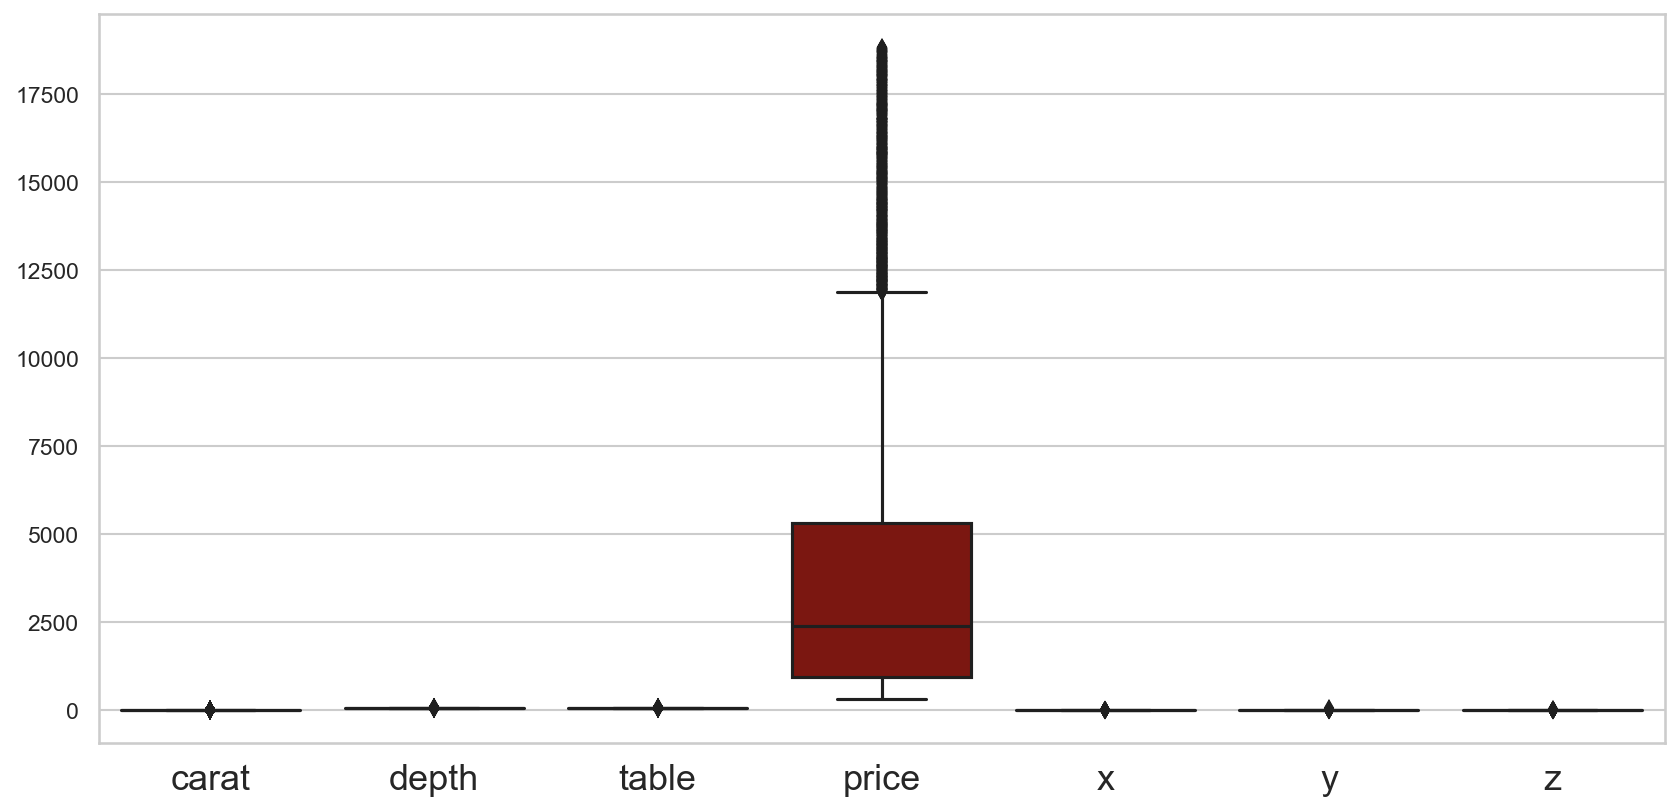

In [14]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df)

**Значения распределены в маленьком масштабе

<Axes: >

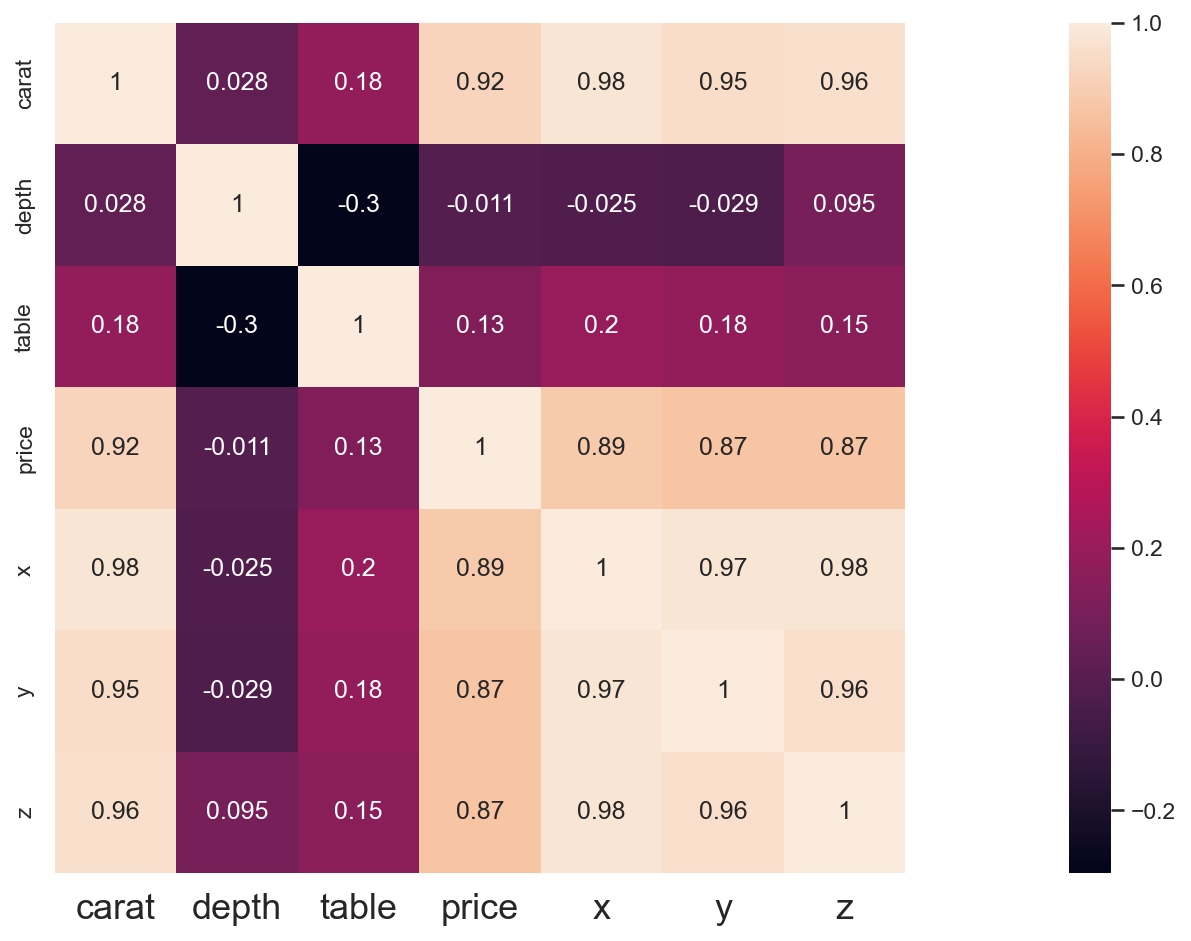

In [15]:
corr = df.corr()
sns.heatmap(data = corr, square = True, annot = True, cbar = True)

### Выводы по корреляции
**Между показателями depth и price обратная зависимость, т.к. чем больше показатель depth, тем "темнее" становится бриллиант и цена его уменьшается
**Price значительно зависит от карат и размеров бриллианта
**Караты в наибольшей значимости влияют на цену
**Помимо зависимости цены от размеров брилланта, размеры коррелируют и между собой

# Визуализация

<Axes: xlabel='carat', ylabel='Density'>

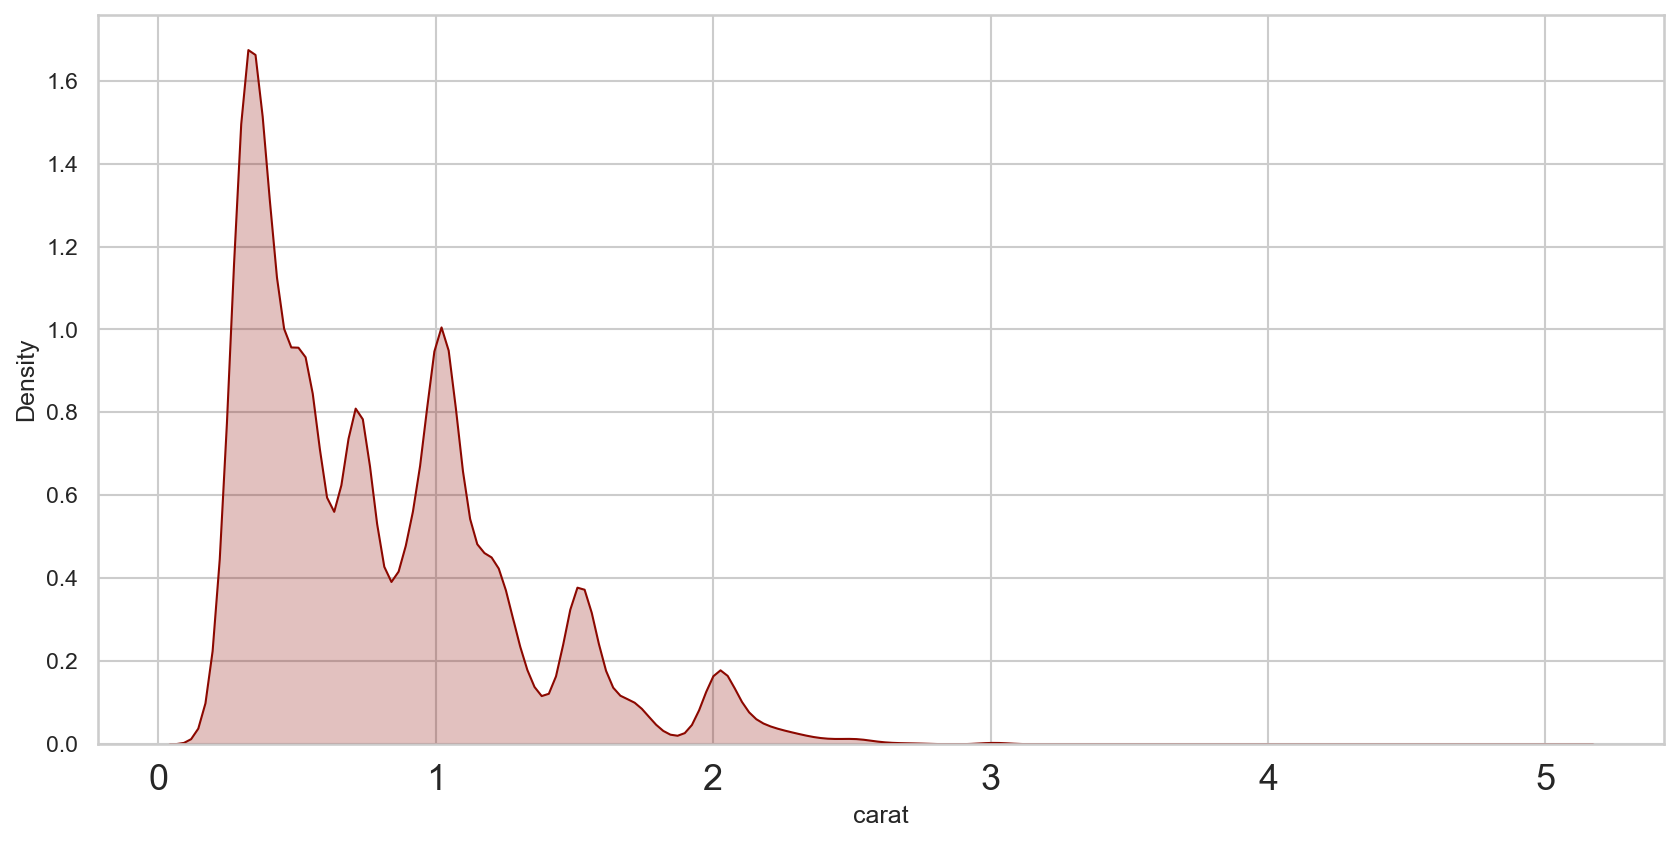

In [16]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['carat'], shade = True, color = 'r')

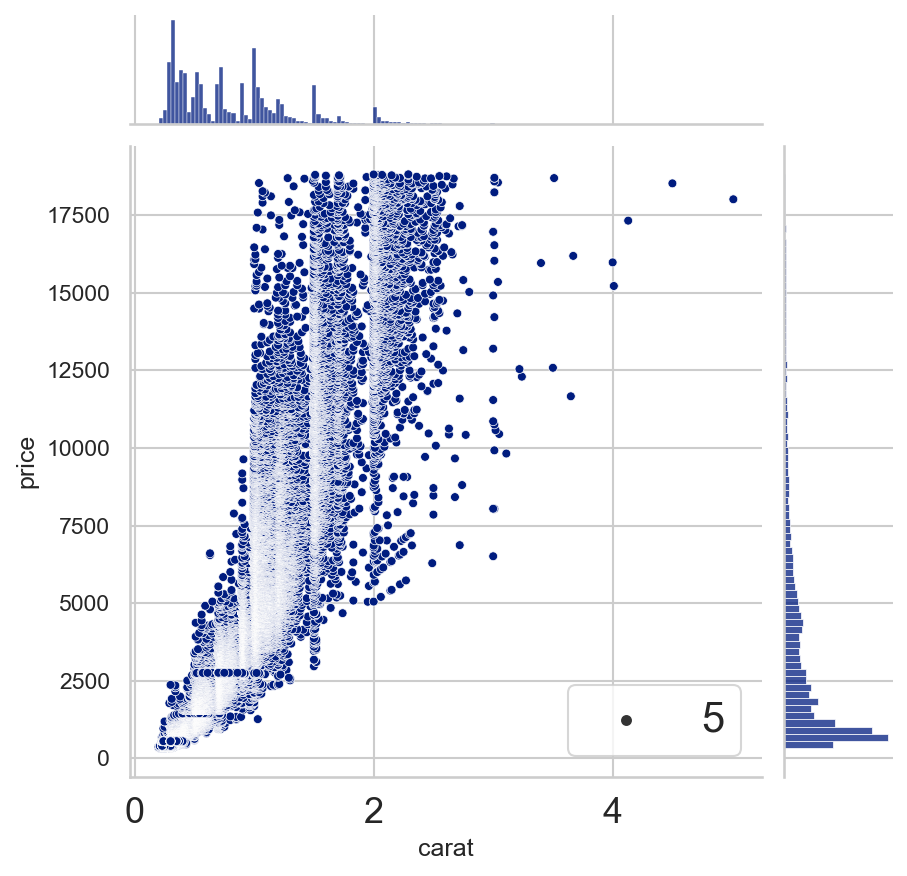

In [17]:
sns.jointplot(x = 'carat', y ='price', data = df, size = 5)

**По всей видимости, карат меняется в зависимости от цены экспоненциально

### Количество обработанных алмазов по типу огранки

<Axes: xlabel='cut', ylabel='count'>

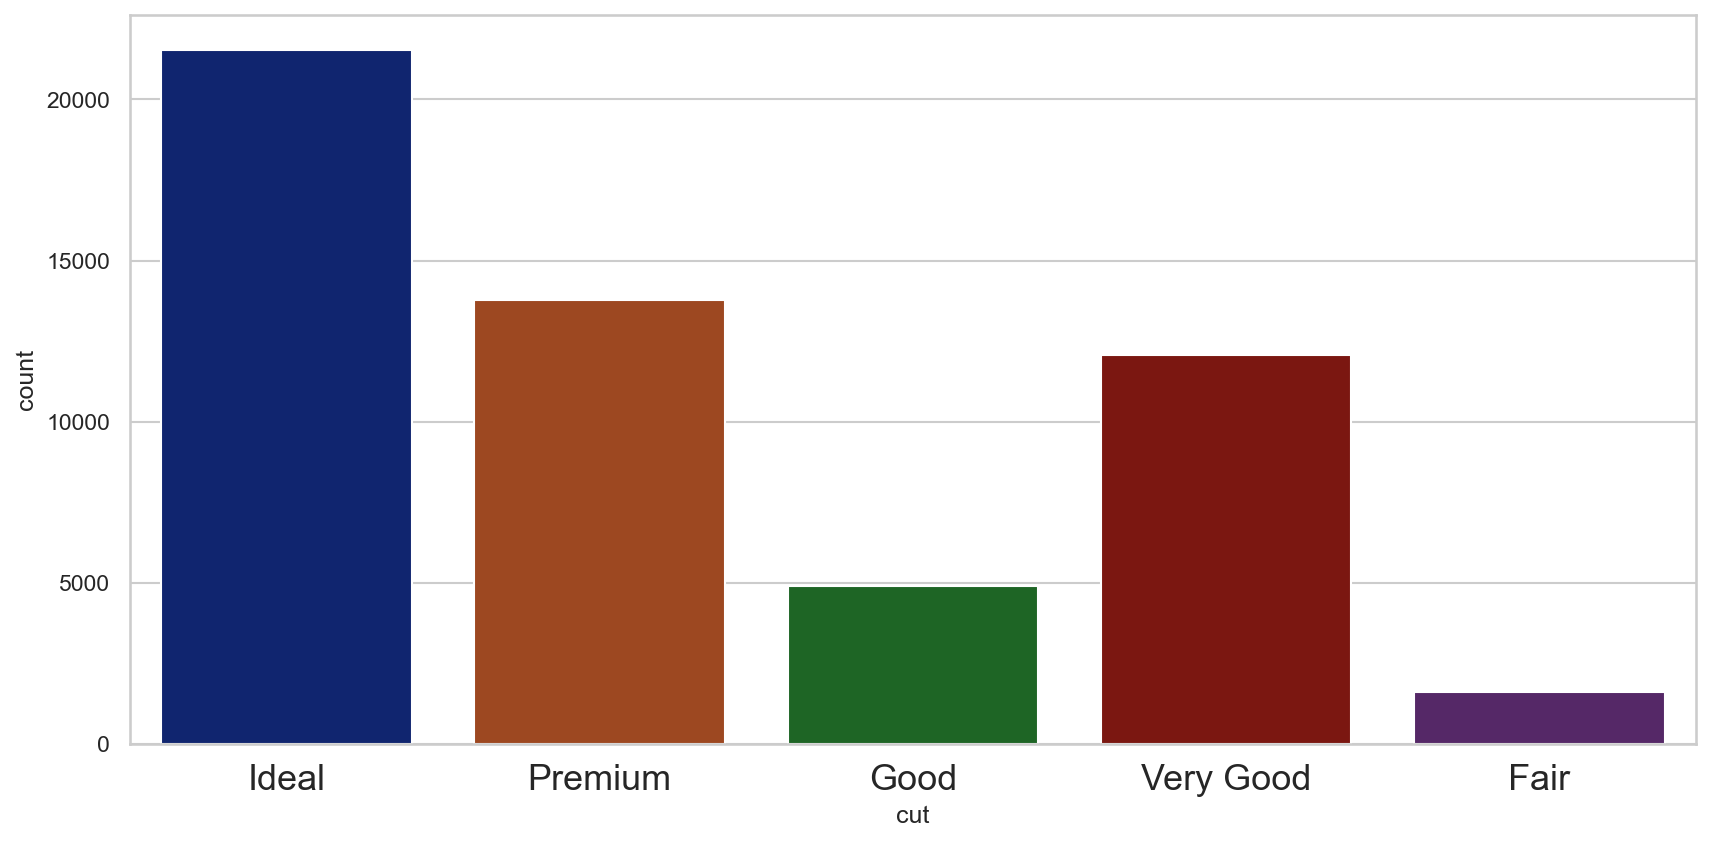

In [18]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'cut')

### Распределение бриллиантов с разной огранкой по цене

<Axes: xlabel='cut', ylabel='price'>

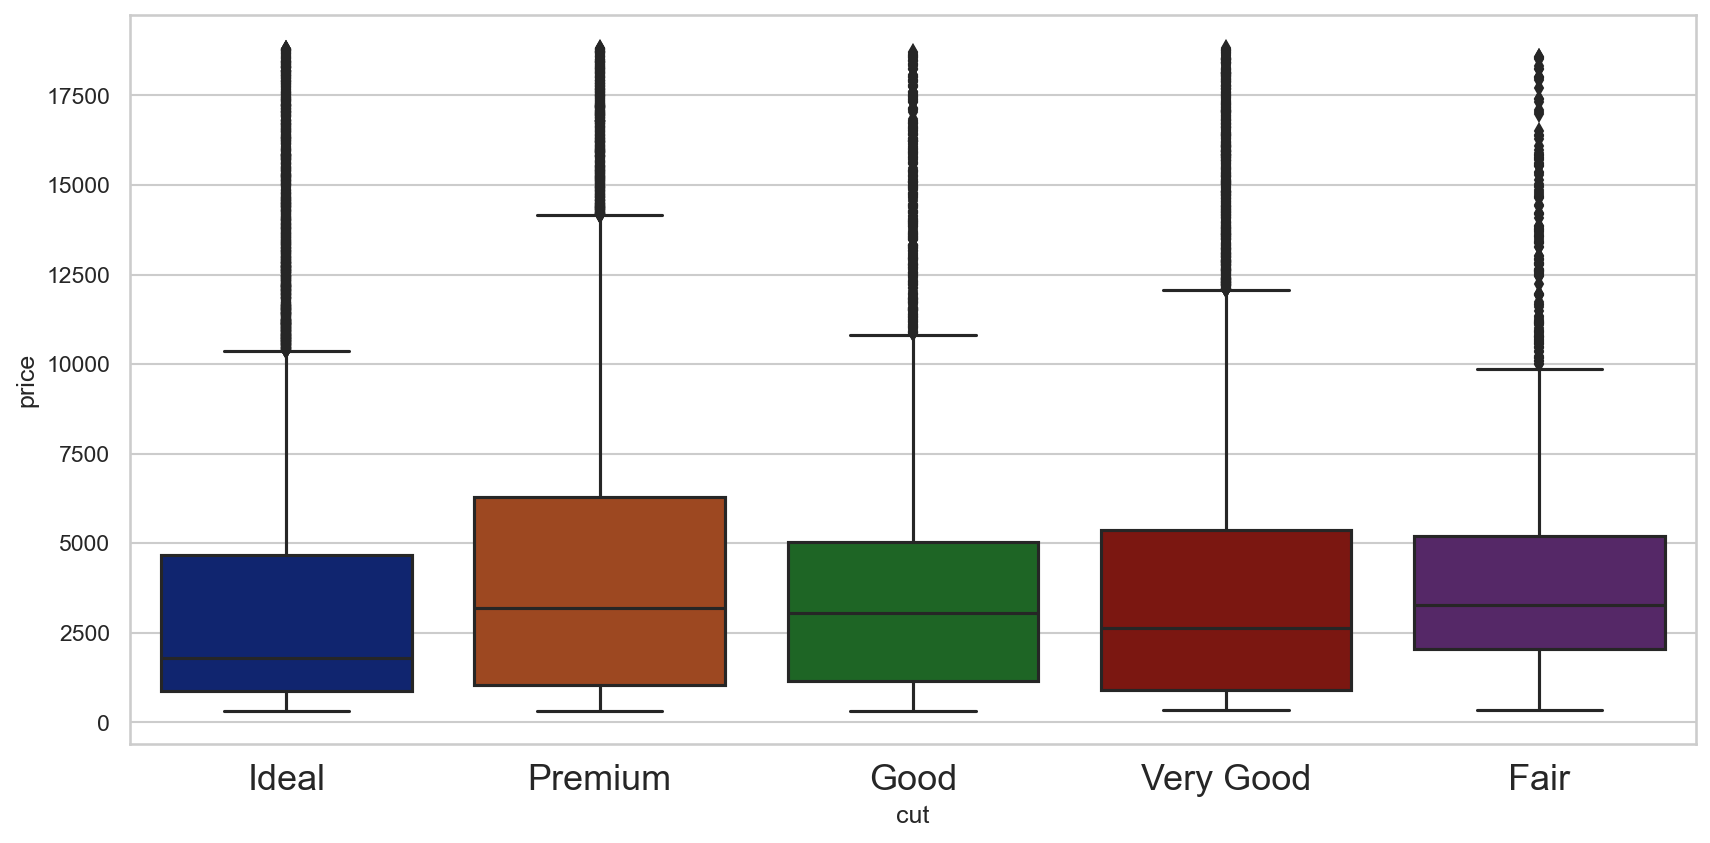

In [19]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'cut', y = 'price')

**Бриллианты премиум-класса, как мы видим, являются самыми дорогими, за ними следуют бриллианты отличной / очень хорошей огранки

### Цвет бриллианта 
Цвет бриллианта относится к тону и насыщенности цвета, или глубине цвета в бриллианте.
Цвет бриллианта может варьироваться от бесцветного до желтого или слабого коричневатого оттенка.
Бесцветные бриллианты встречаются реже и более ценны, потому что они кажутся белее и ярче.

## Количество бриллиантов по цвету
D - бесцветный, лучший
J - почти бесцветный, худший

<Axes: xlabel='color', ylabel='count'>

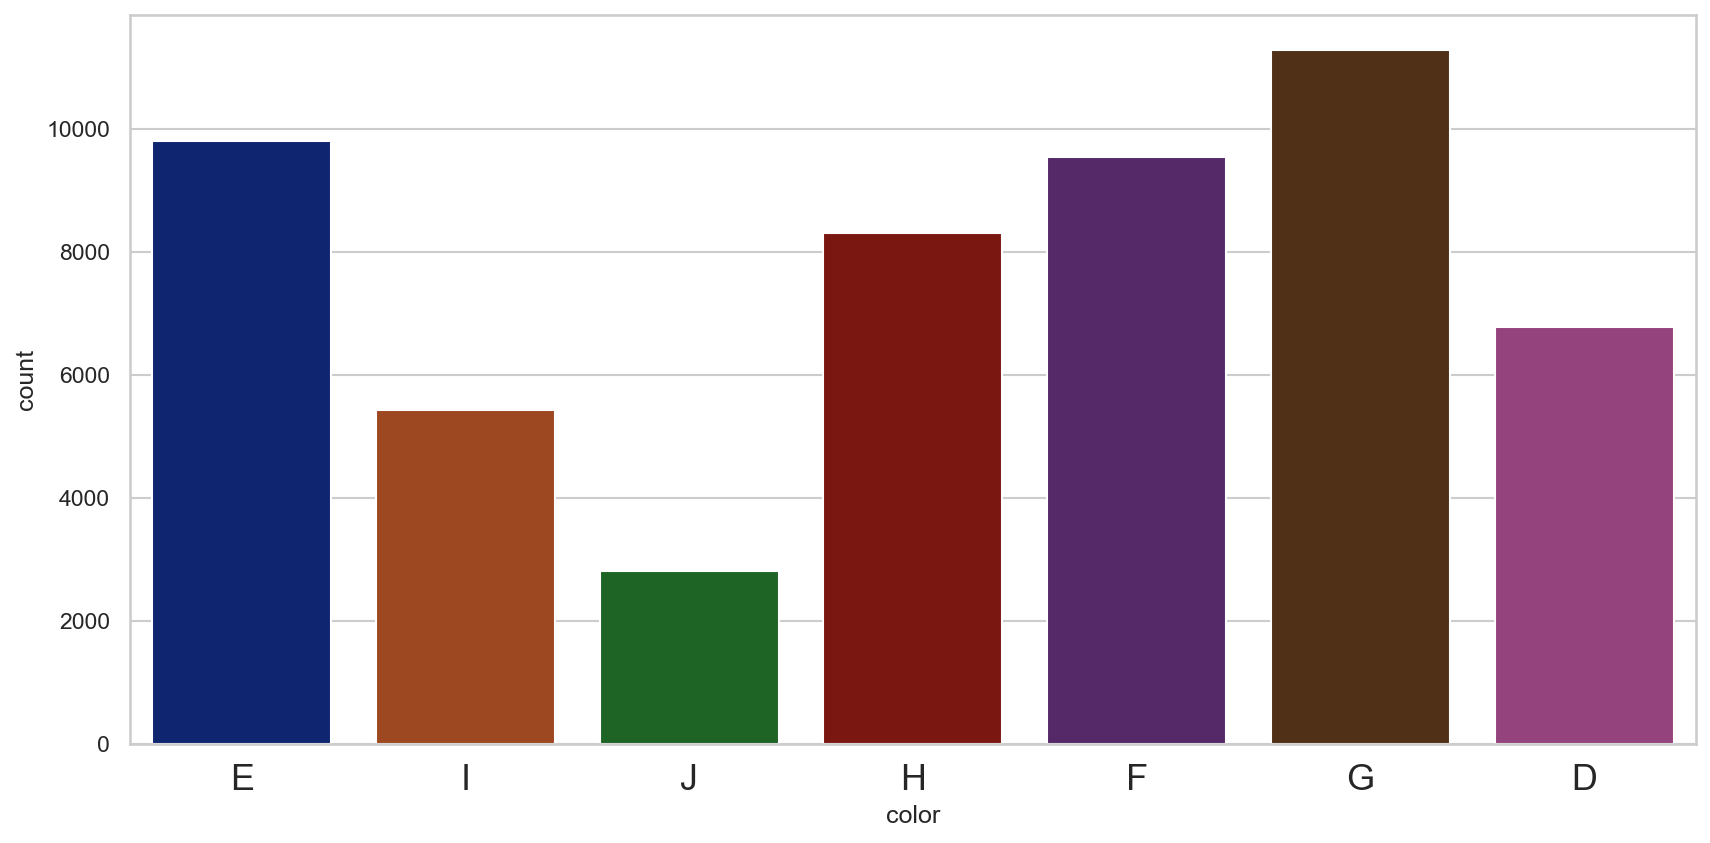

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, x='color')

### Распределение бриллиантов по цвету и цене

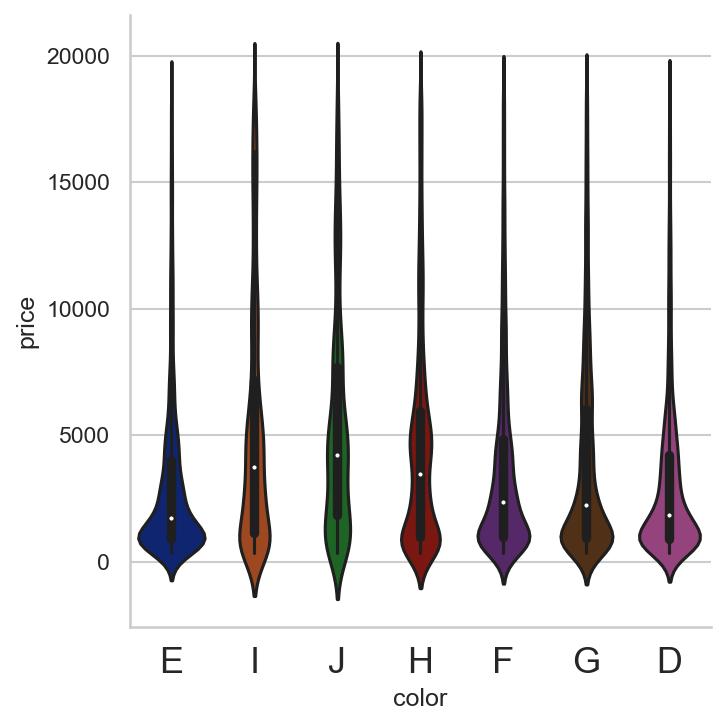

In [21]:
sns.catplot(data = df, kind="violin", x="color", y="price")

### Прозрачность алмаза 
(В порядке от лучшего к худшему, FL = безупречный, I3 = включения 3-го уровня) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

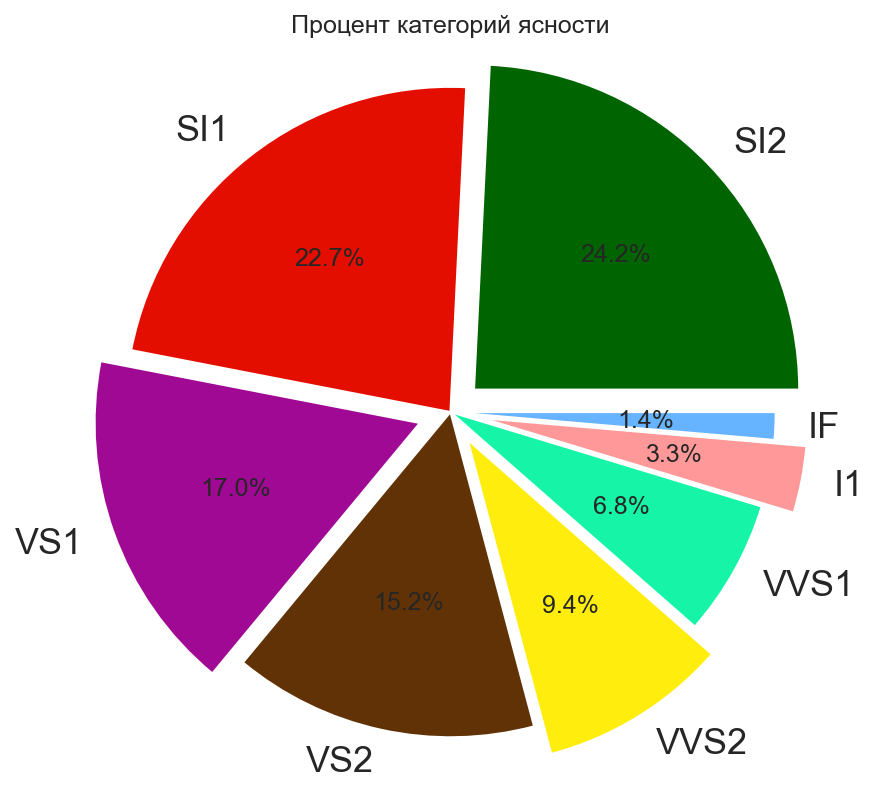

In [22]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Процент категорий ясности')
plt.plot()
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

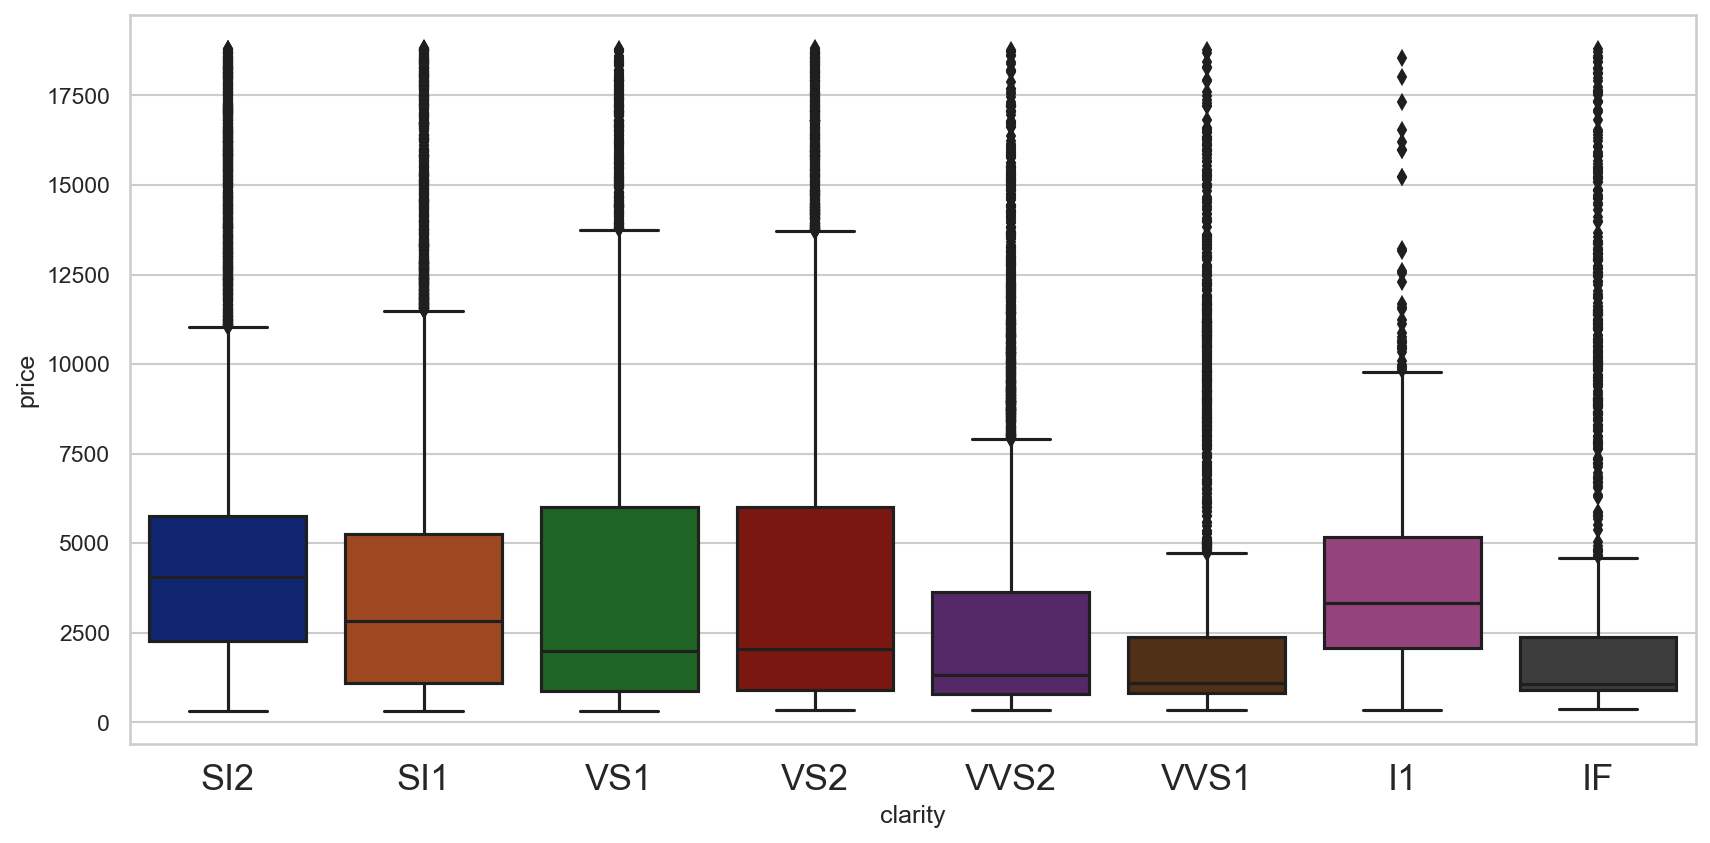

In [23]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'clarity', y = 'price')

**Похоже, что VS1 и VS2 одинаково влияют на цену бриллианта, имея довольно высокую цену

### Глубина
Если процент глубины алмаза слишком велик или мал, алмаз станет темным на вид, потому что он больше не будет отражать привлекательное количество света

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <BarContainer object of 25 artists>)

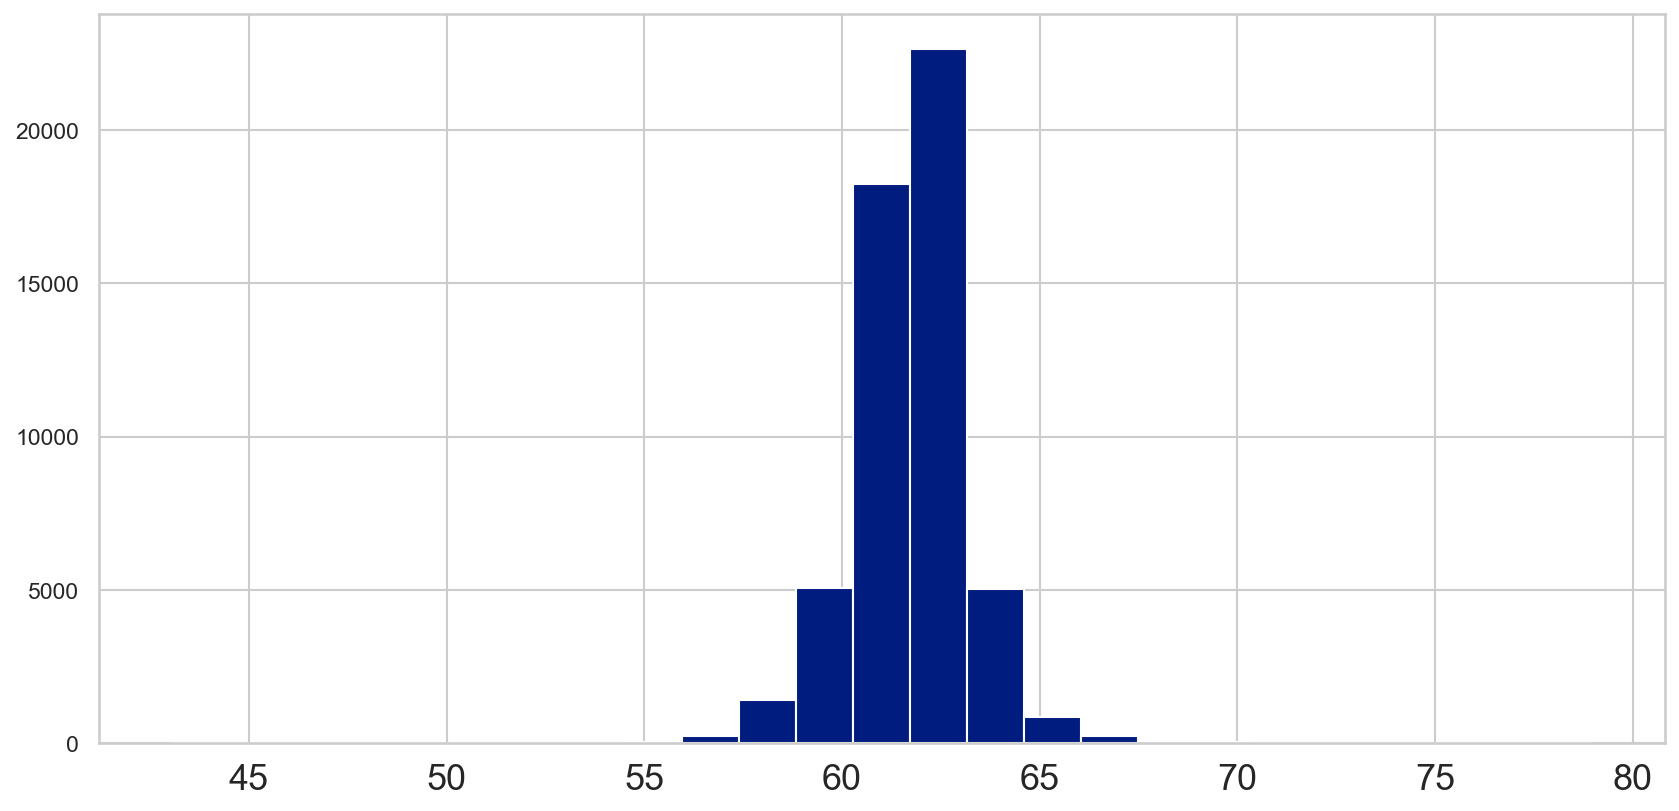

In [24]:
plt.figure(figsize = (12,6))
plt.hist('depth', data = df, bins = 25)

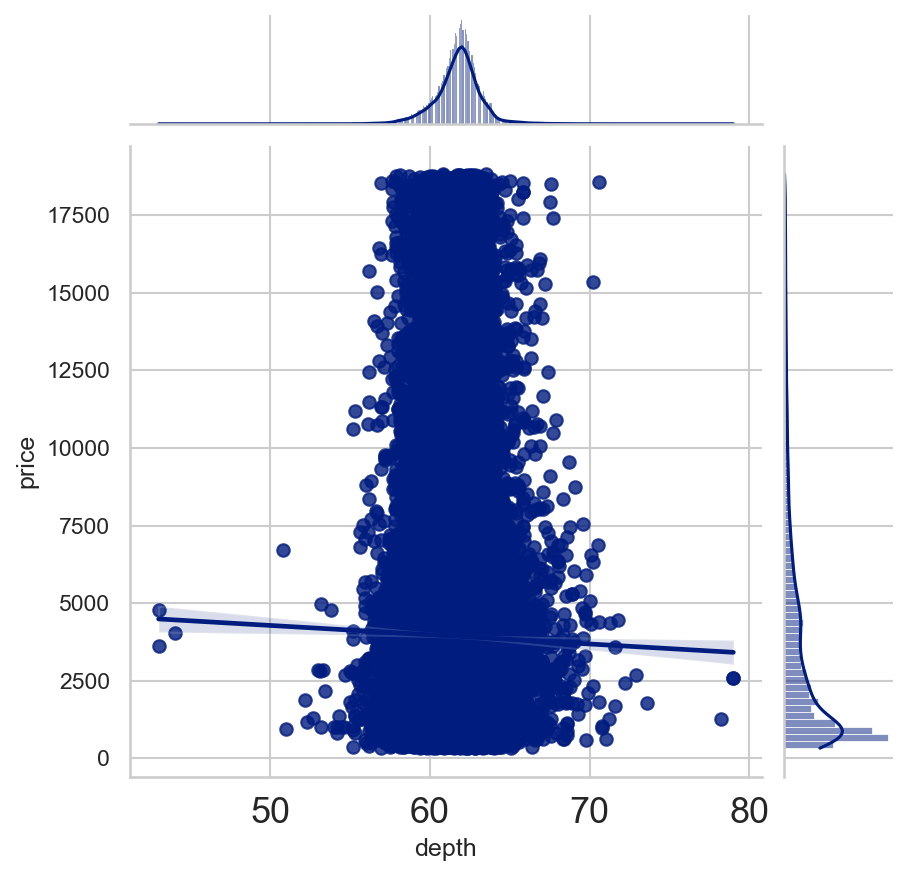

In [55]:
sns.jointplot(x = 'depth', y = 'price', data = df, kind = 'reg')

**Из графика мы можем сделать вывод, что цена может сильно варьироваться для одной и той же глубины
Так же стоит вспомнить, что корреляция Пирсона показывает, что между ними существует обратная зависимость

###  Стол
Стол относится к плоской грани алмаза, видимой, когда камень обращен лицевой стороной вверх. Основное назначение алмазного стола - преломлять проникающие лучи света и позволять отраженным лучам света изнутри бриллианта попадать в глаза наблюдателя. Идеальная огранка бриллианта придаст бриллианту потрясающий огонь и блеск
Если таблица (верхняя плоская грань) слишком велика, то свет не будет отражаться ни от одного из углов или граней короны и не создаст искрящихся цветов радуги
Если он слишком мал, то свет попадет в ловушку, и этот привлекающий внимание луч света никогда не выйдет наружу, а будет “просачиваться” из других мест алмаза

<Axes: xlabel='table', ylabel='Density'>

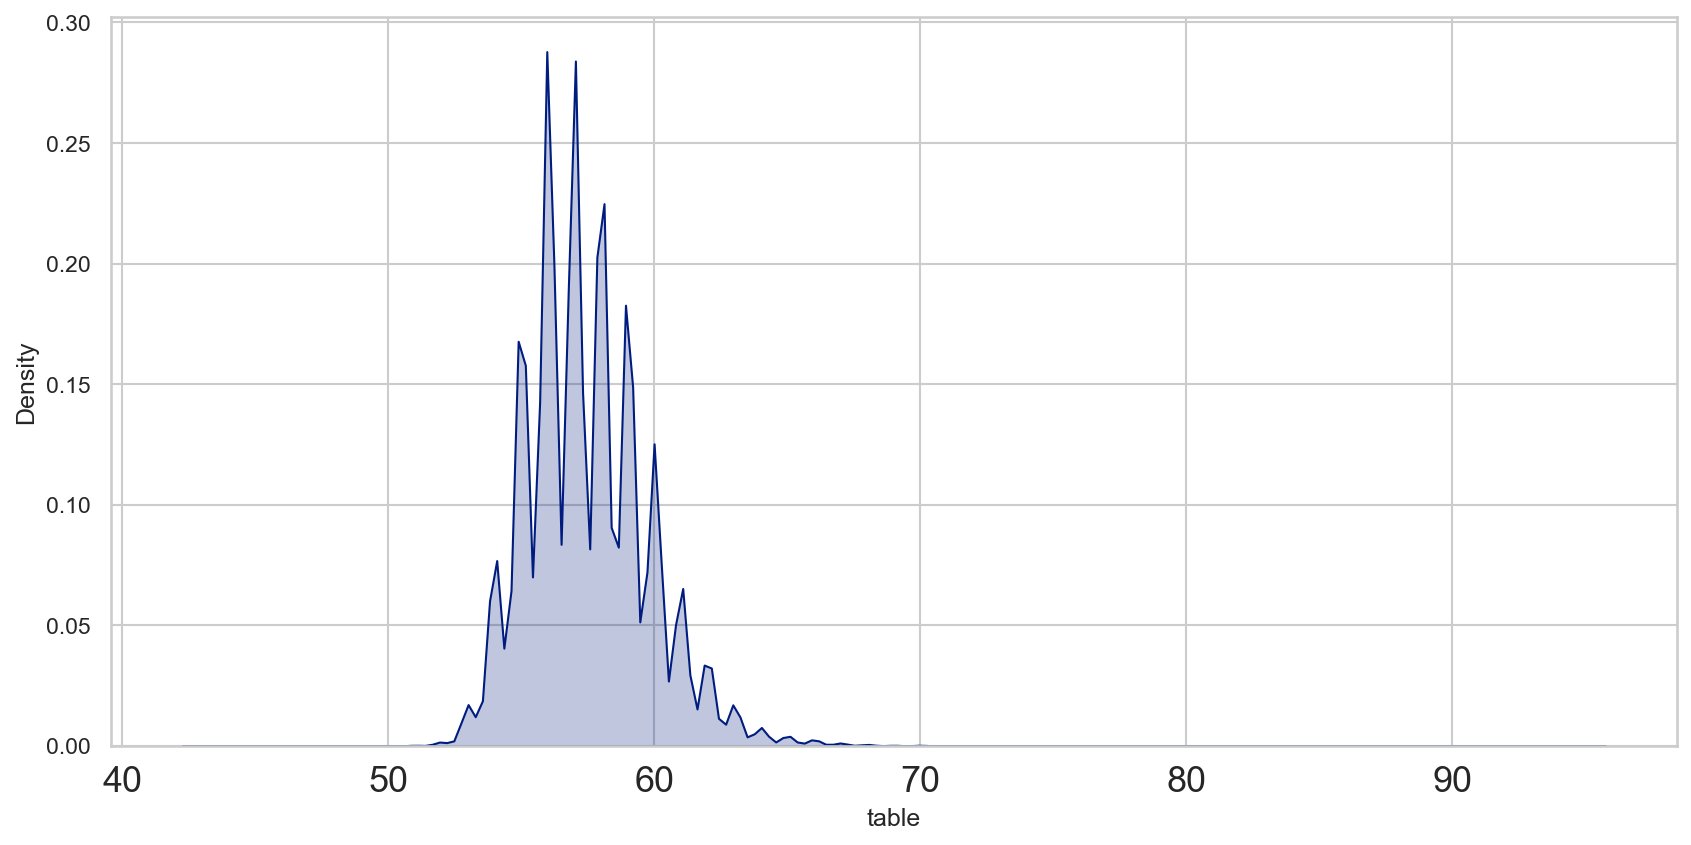

In [25]:
plt.figure(figsize = (12,6))
sns.kdeplot(df['table'], shade = True)

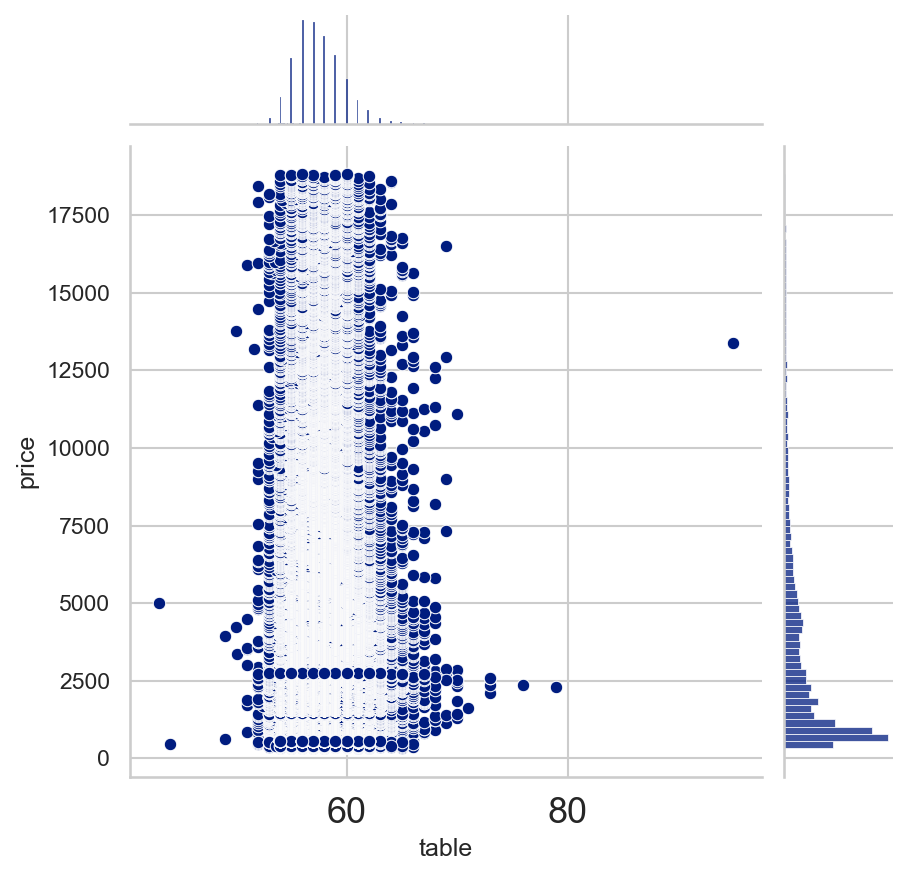

In [58]:
sns.jointplot(x = 'table', y = 'price', data = df, kind = )

### Размеры
По мере увеличения размеров, очевидно, растут и цены

(2.0, 10.0)

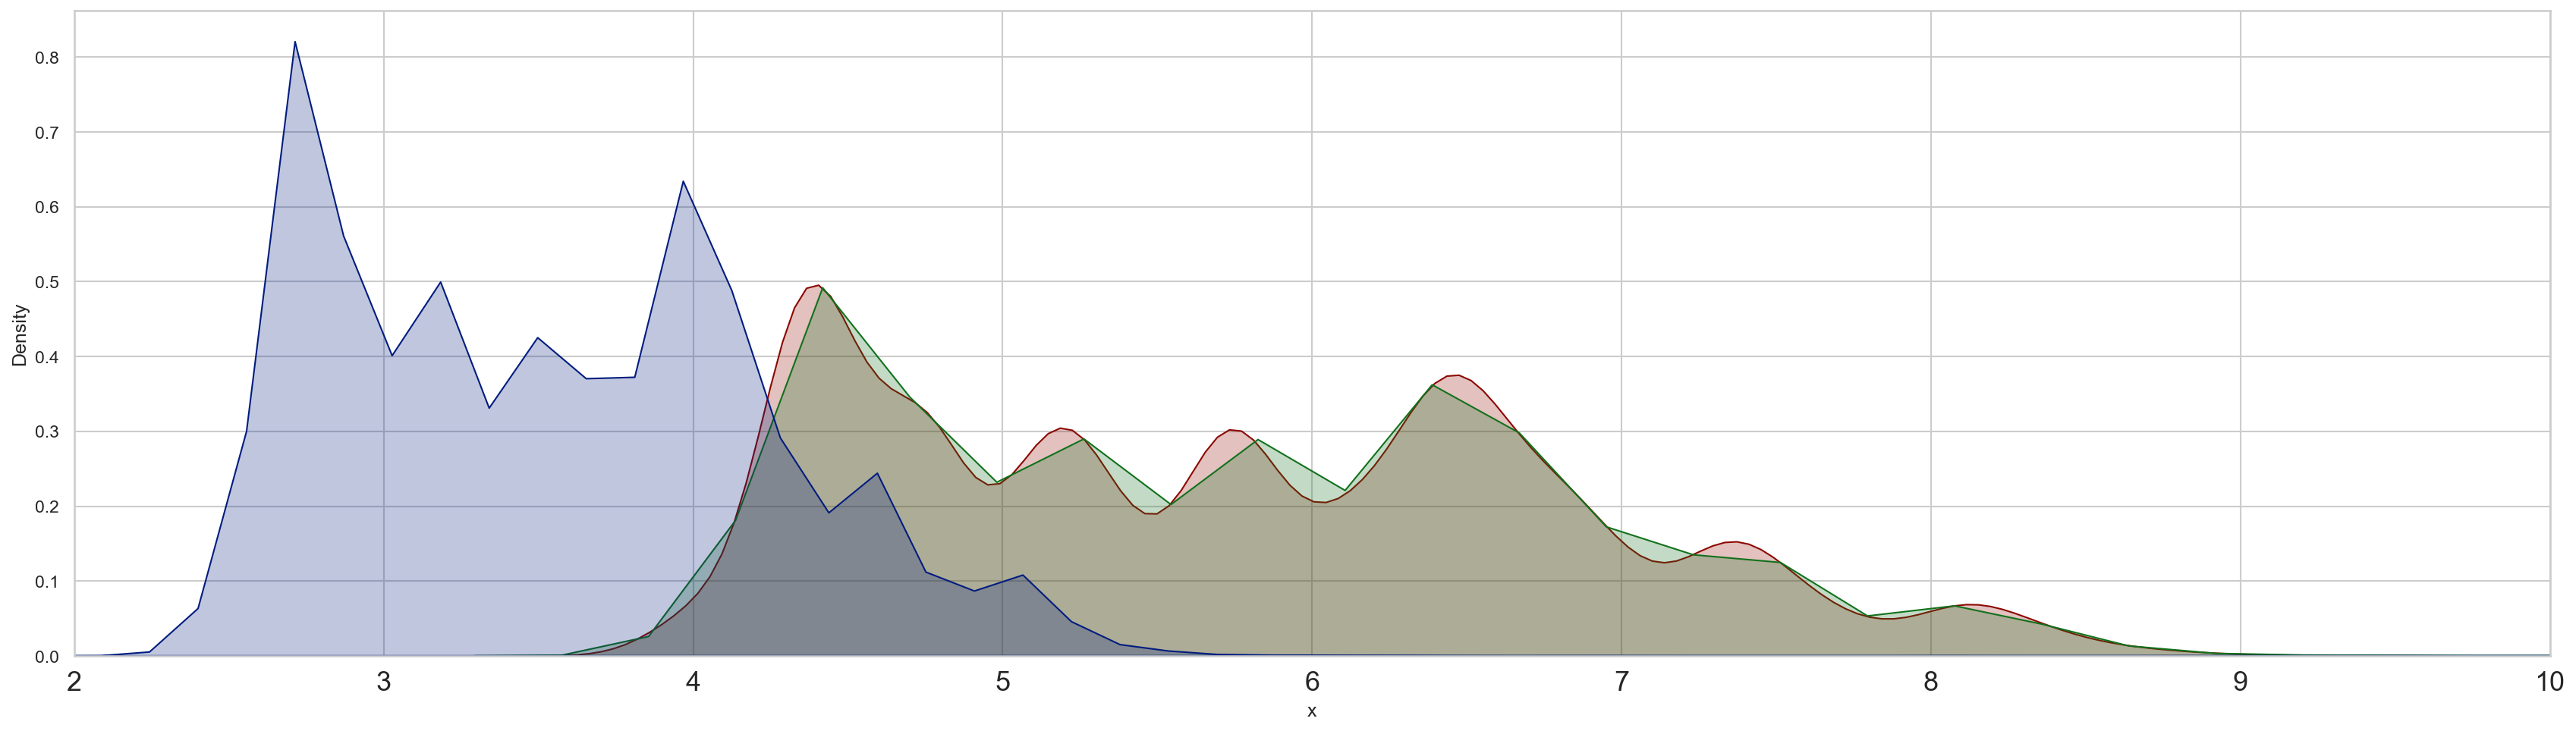

In [26]:
sns.kdeplot(df['x'], shade = True, color = 'r')
sns.kdeplot(df['y'], shade = True, color = 'g')
sns.kdeplot(df['z'], shade = True, color = 'b')
plt.xlim(2,10)

### Создание функции 'volume', чтобы определить как объем влияет на цену

In [27]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0.0, 50000.0)

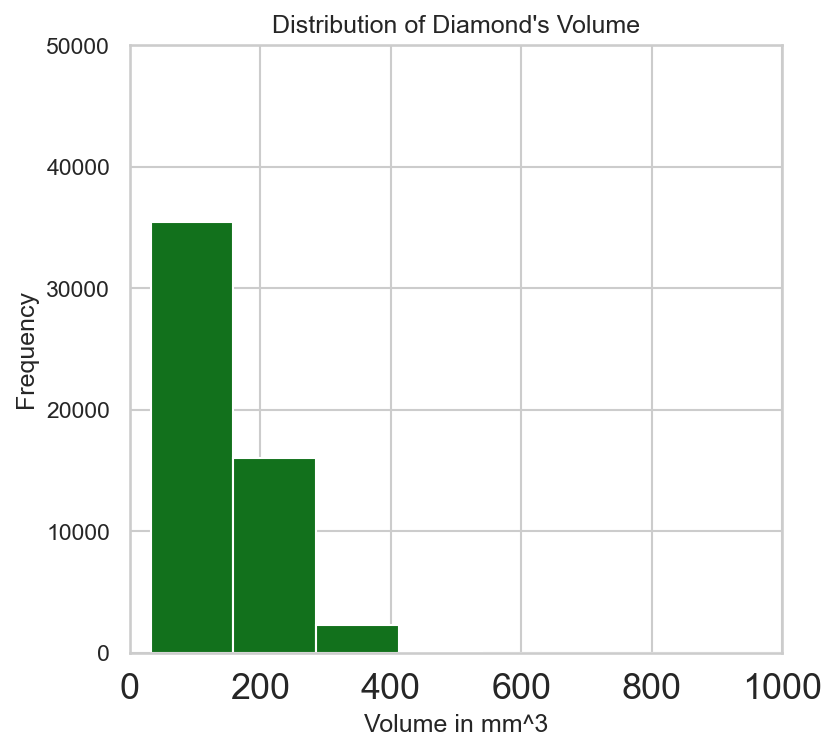

In [28]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

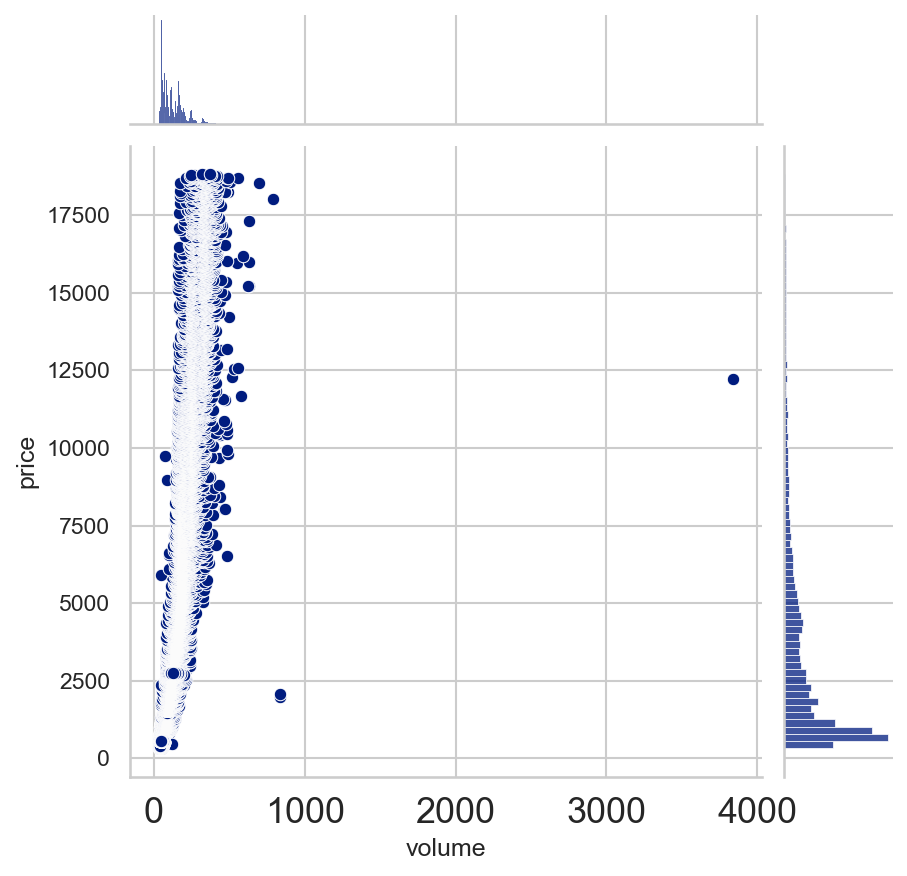

In [29]:
sns.jointplot(x = 'volume',  y = 'price', data = df)

**Похоже, что существует линейная зависимость между ценой и объемом

In [30]:
df.drop(['x', 'y', 'z'], axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


Обозначим категориальные признаки цифрами для различения, поскольку мы не можем передавать строковые данные для моделирования

In [31]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


Разделим набор данных на обучающую и тестовую выборки, чтобы использовать обучающий алгоритм для моделирования алгоритмов и прогнозировать
Затем применим масштабирование объектов, хотя в данном случае это необязательно

In [33]:
X = df.drop(['price'], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Моделирование алгоритма

In [35]:
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

### Линейная регрессия

In [36]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression ########')
print('Score: %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE: %0.2f ' % mse)
print('MAE: %0.2f ' % mae)
print('RMSE: %0.2f ' % rmse)
print('R2: %0.2f ' % r2)

R2_Scores.append(r2)


####### Linear Regression ########
Score: 0.8814
[0.87116164 0.88350756 0.87757769 0.87635168 0.88384912]

MSE: 1911398.80 
MAE: 926.72 
RMSE: 1382.53 
R2: 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Лассо регрессия

In [37]:
clf_lr = Lasso()
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Lasso Regression ########')
print('Score: %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE: %0.2f ' % mse)
print('MAE: %0.2f ' % mae)
print('RMSE: %0.2f ' % rmse)
print('R2: %0.2f ' % r2)

R2_Scores.append(r2)


####### Lasso Regression ########
Score: 0.8814
[0.87146434 0.88349434 0.87757734 0.87636606 0.88384393]

MSE: 1911408.72 
MAE: 926.25 
RMSE: 1382.54 
R2: 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Адабуст алгоритм

In [38]:
clf_lr = AdaBoostRegressor(n_estimators = 1000)
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### AdaBoost Regression ########')
print('Score: %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE: %0.2f ' % mse)
print('MAE: %0.2f ' % mae)
print('RMSE: %0.2f ' % rmse)
print('R2: %0.2f ' % r2)

R2_Scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



####### AdaBoost Regression ########
Score: 0.8826
[0.86501446 0.89216623 0.88974945 0.882893   0.87759838]

MSE: 1892908.68 
MAE: 1097.67 
RMSE: 1375.83 
R2: 0.88 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished


### Ридж регрессия

In [39]:
clf_lr = Ridge()
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Ridge Regression ########')
print('Score: %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE: %0.2f ' % mse)
print('MAE: %0.2f ' % mae)
print('RMSE: %0.2f ' % rmse)
print('R2: %0.2f ' % r2)

R2_Scores.append(r2)


####### Ridge Regression ########
Score: 0.8814
[0.87094576 0.88350862 0.87757823 0.87635359 0.88384919]

MSE: 1911385.59 
MAE: 926.70 
RMSE: 1382.53 
R2: 0.88 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Градиент бустинг

In [40]:
clf_lr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0, verbose = 1)
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Gradient Boosting Regression ########')
print('Score: %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE: %0.2f ' % mse)
print('MAE: %0.2f ' % mae)
print('RMSE: %0.2f ' % rmse)
print('R2: %0.2f ' % r2)

R2_Scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            1.78s
         2    12437807.7359            1.76s
         3    11113339.5845            1.68s
         4     9945244.2308            1.60s
         5     8973416.9156            1.55s
         6     8109014.7842            1.52s
         7     7387120.0500            1.50s
         8     6753937.9878            1.47s
         9     6197182.6819            1.44s
        10     5724689.0901            1.42s
        20     3200362.4597            1.24s
        30     2393542.3170            1.07s
        40     2102586.3335            0.92s
        50     1923964.9187            0.76s
        60     1790574.6006            0.62s
        70     1688380.2826            0.47s
        80     1609829.0076            0.31s
        90     1548089.0039            0.16s
       100     1499127.4566            0.00s
      Iter       Train Loss   Remaining Time 
         1    13994442.1962            1.48s
        

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20     3206145.1577            1.06s
        30     2394369.2846            0.92s
        40     2101114.6326            0.78s
        50     1921108.4005            0.65s
        60     1785959.4111            0.52s
        70     1683385.7302            0.39s
        80     1604163.5538            0.26s
        90     1542370.2912            0.13s
       100     1493476.7608            0.00s
      Iter       Train Loss   Remaining Time 
         1    14044115.9884            1.33s
         2    12472837.6750            1.34s
         3    11137657.6396            1.37s
         4     9974212.6419            1.33s
         5     8994369.5031            1.32s
         6     8133396.8459            1.32s
         7     7407925.9669            1.31s
         8     6764110.5537            1.29s
         9     6215416.1793            1.28s
        10     5736700.1166            1.28s
        20     3210108.0310            1.10s
        30     2402276.2056            0.94s
        4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished


### Случайный лес

In [41]:
clf_lr = RandomForestRegressor()
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Random Forest ########')
print('Score: %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE: %0.2f ' % mse)
print('MAE: %0.2f ' % mae)
print('RMSE: %0.2f ' % rmse)
print('R2: %0.2f ' % r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished



####### Random Forest ########
Score: 0.9821
[0.9791552  0.98068402 0.98174426 0.9771532  0.98129149]

MSE: 287786.77 
MAE: 271.71 
RMSE: 536.46 
R2: 0.98 


Параметры настройки

In [42]:
no_of_test = [100]
params_dict = {'n_estimators': no_of_test, 'n_jobs': [-1], 'max_features': ['auto','sqrt','log2' ]}
clf_rf = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params_dict, scoring = 'r2')
clf_rf.fit(X_train, y_train)
print('Score: %.4f' % clf_lr.score(X_test, y_test))
pred = clf_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2: %0.2f ' % r2)

R2_Scores.append(r2)

Score: 0.9821
R2: 0.98 


### KNeighbours регрессия

In [43]:
clf_lr = KNeighborsRegressor()
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5, verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### KNeighbor Regression ########')
print('Score: %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE: %0.2f ' % mse)
print('MAE: %0.2f ' % mae)
print('RMSE: %0.2f ' % rmse)
print('R2: %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished



####### KNeighbor Regression ########
Score: 0.9590
[0.95429066 0.95857186 0.95505346 0.94931436 0.95517442]

MSE: 660491.58 
MAE: 425.09 
RMSE: 812.71 
R2: 0.96 


Параметры настройки

In [45]:
n_neighbors = []
for i in range (0,50,5):
    if (i != 0):
        n_neighbors.append(i)
params_dict = {'n_neighbors': n_neighbors, 'n_jobs': [-1]}
clf_knn = GridSearchCV(estimator = KNeighborsRegressor(), param_grid = params_dict, scoring = 'r2')
clf_knn.fit(X_train, y_train)
print('Score: %.4f' % clf_lr.score(X_test, y_test))
pred = clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2: %0.2f ' % r2)
R2_Scores.append(r2)

Score: 0.9590
R2: 0.96 


### Визуализация R2-оценки алгоритмов

In [46]:
compare = pd.DataFrame({'Algorithms': models, 'R2-Scores': R2_Scores})
compare.sort_values(by = 'R2-Scores', ascending = False)

,Algorithms,R2-Scores
5,RandomForest Regression,0.982148
6,KNeighbours Regression,0.959028
4,GradientBoosting Regression,0.905833
2,AdaBoost Regression,0.882579
3,Ridge Regression,0.881433
0,Linear Regression,0.881432
1,Lasso Regression,0.881431


<Axes: xlabel='R2-Scores', ylabel='Algorithms'>

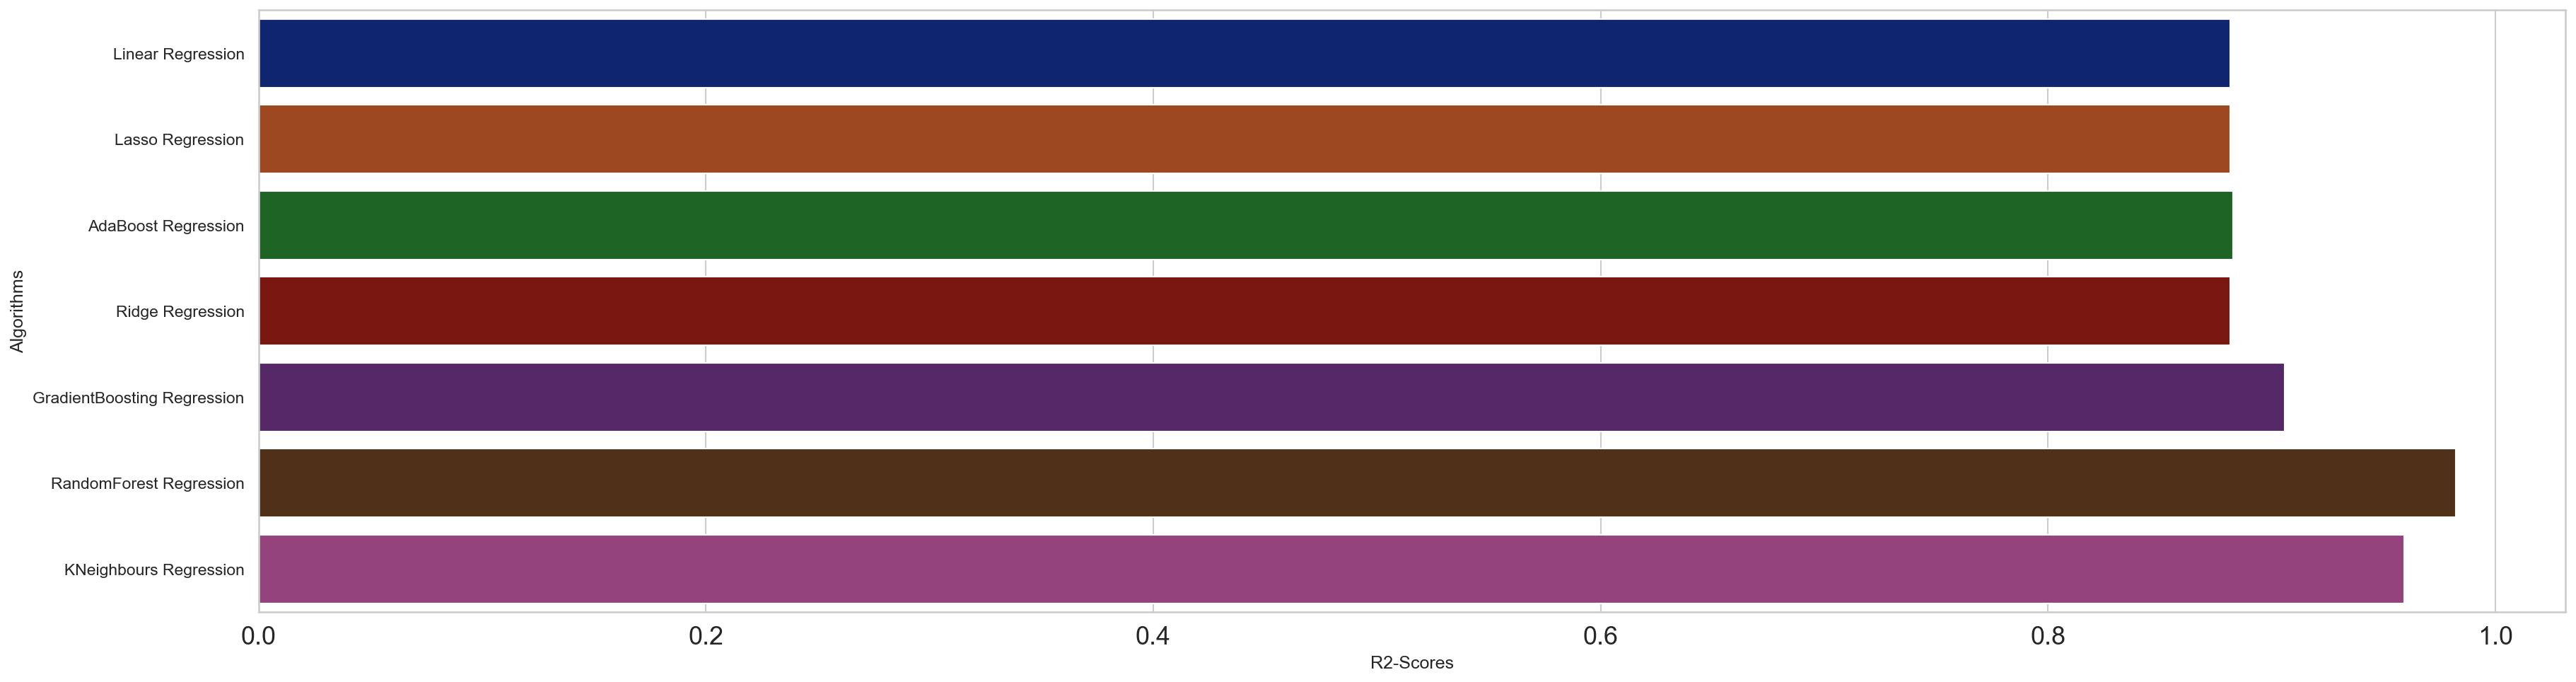

In [47]:
sns.barplot(x = 'R2-Scores', y = 'Algorithms', data = compare)

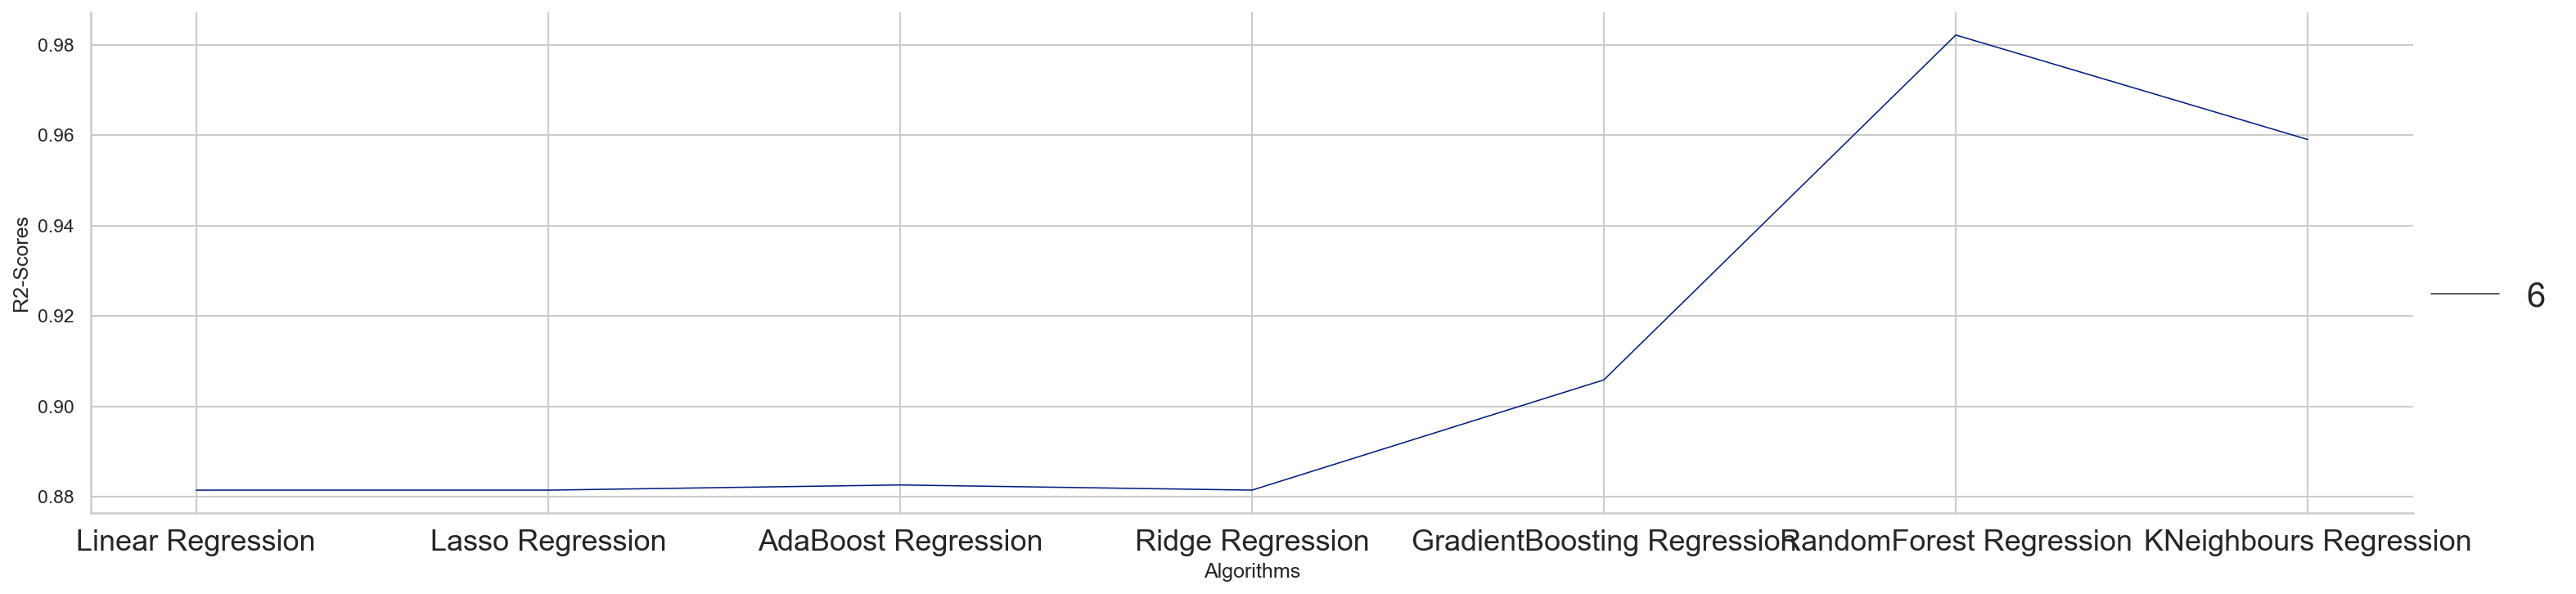

In [48]:
sns.relplot(data=compare, kind = 'line', x="Algorithms", y = 'R2-Scores', size = 6, aspect = 4)

##### Случайный лес дает нам R2-балл в 98%